Training Set Size: (60000, 28, 28) (60000,)
Test Set Size: (10000, 28, 28) (10000,)


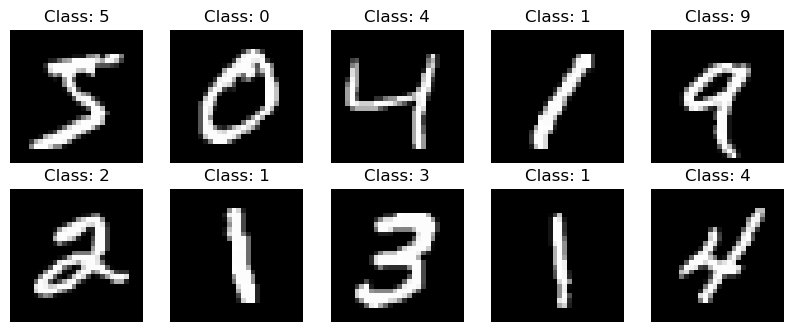

Training Set Size : (60000, 28, 28, 1)
Test Set Size: (10000, 28, 28, 1)
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7876 - loss: 0.6653 - precision_4: 0.8988 - recall_4: 0.6908 - val_accuracy: 0.9781 - val_loss: 0.0701 - val_precision_4: 0.9823 - val_recall_4: 0.9754
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9676 - loss: 0.1097 - precision_4: 0.9742 - recall_4: 0.9616 - val_accuracy: 0.9866 - val_loss: 0.0430 - val_precision_4: 0.9879 - val_recall_4: 0.9850
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9769 - loss: 0.0755 - precision_4: 0.9807 - recall_4: 0.9734 - val_accuracy: 0.9893 - val_loss: 0.0337 - val_precision_4: 0.9907 - val_recall_4: 0.9880
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9822 - loss: 0.0595 - precision_4: 0.9850 - recall_4: 0.9799 - val_accuracy: 0.9906 - val_loss: 0.0293 - val_precision_4: 0.9915 - val_recall_4: 0.9895
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - a

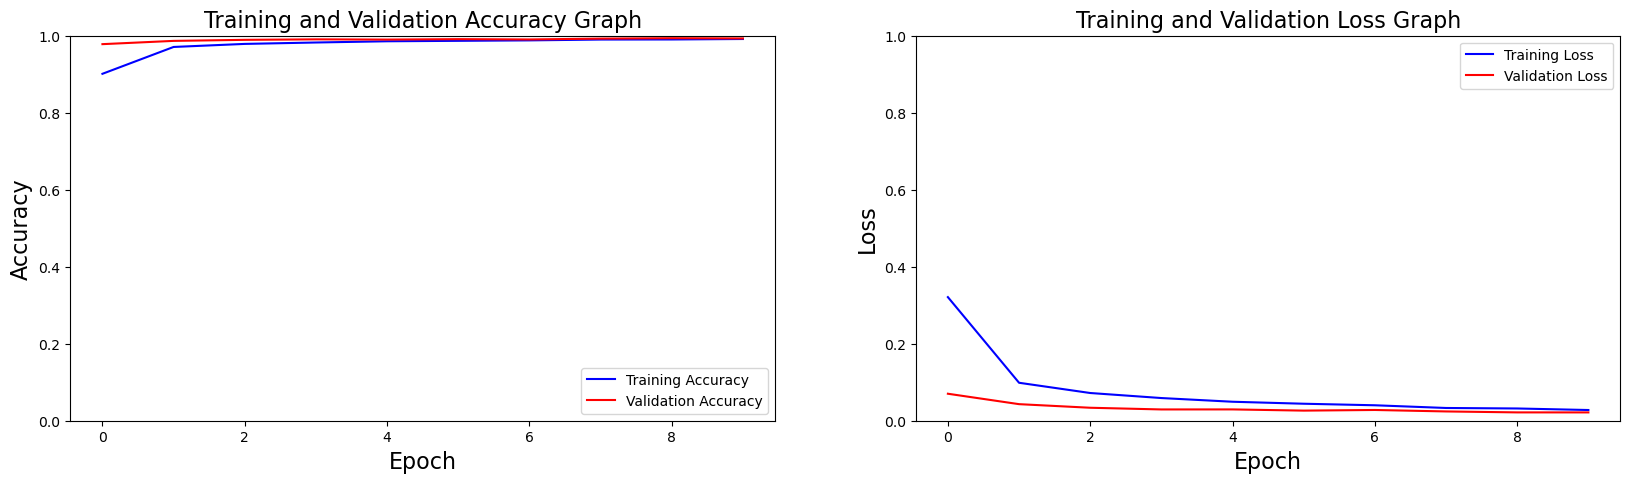

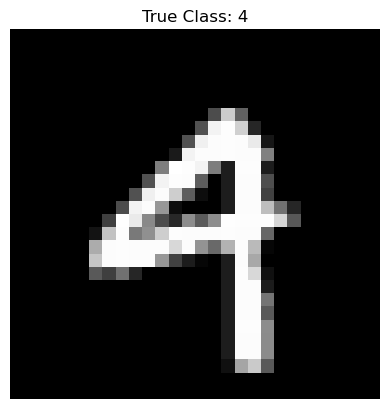

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Class: 4
Predicted Class Probability: 0.9918
Other Class Probabilities: 
[[3.7577742e-08 8.0493601e-07 5.8965490e-08 6.9497643e-09 9.9179709e-01
  3.4925890e-07 1.4805943e-08 2.4189653e-06 1.0300121e-08 8.1991507e-03]]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


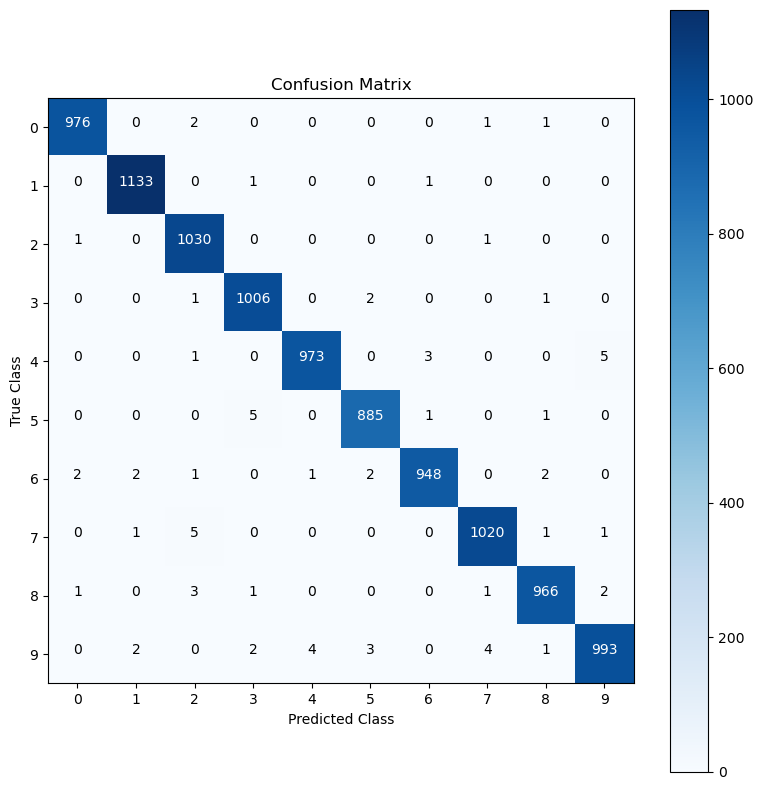

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [32]:
import numpy as np  # NumPy is used for numerical operations, providing support for large multi-dimensional arrays and matrices.
import matplotlib.pyplot as plt  # Matplotlib is a plotting library that allows you to create static, animated, and interactive visualizations in Python.
import random  # Random is used to generate random numbers, useful for sampling data or selecting random items.
import warnings  # Warnings is used to manage warning messages generated during runtime.
import tensorflow as tf  # TensorFlow is an open-source machine learning framework used for building and training models.
from tensorflow.keras.datasets import mnist  # MNIST is a dataset of handwritten digits included in Keras, which simplifies the process of loading and preprocessing data.
from tensorflow.keras.models import Sequential  # Sequential is a type of Keras model that allows you to build a linear stack of layers.
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout  # These are different layers you can use to build your neural network.
from tensorflow.keras.utils import to_categorical  # This function is used to convert labels into a categorical format for multi-class classification tasks.
from sklearn.metrics import classification_report, confusion_matrix  # These functions are used to evaluate the model's performance with detailed metrics.

# Suppress warnings related to deprecated or future features
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Ignore warnings about deprecated features in the code.
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignore warnings about future changes in libraries.
warnings.filterwarnings("ignore", category=UserWarning)  # Ignore general user warnings.

# Load the MNIST dataset, which consists of 70,000 images of handwritten digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Load the dataset and split it into training and testing sets.
print("Training Set Size:", x_train.shape, y_train.shape)  # Display the dimensions of the training data.
print("Test Set Size:", x_test.shape, y_test.shape)  # Display the dimensions of the test data.

# Function to visualize a sample of images and their corresponding labels
def visualize_samples(images, labels, n=10):
    plt.figure(figsize=(10, 10))  # Create a figure with specified size for visualizing samples.
    for i in range(n):  # Loop through the number of images to display.
        ax = plt.subplot(5, 5, i + 1)  # Create a subplot for each image (5 rows and 5 columns).
        plt.imshow(images[i], cmap="gray")  # Display the image in grayscale.
        plt.title(f'Class: {labels[i]}')  # Set the title to the corresponding label of the image.
        plt.axis("off")  # Turn off axis labels to enhance visualization.
    plt.show()  # Render the plot.

# Visualize the first 10 samples from the training set
visualize_samples(x_train, y_train)  # Call the visualization function to show samples.

# Preprocess the data: Convert labels to categorical format for multi-class classification
y_train = to_categorical(y_train, num_classes=10)  # Convert training labels to a one-hot encoded format.
y_test = to_categorical(y_test, num_classes=10)  # Convert test labels to a one-hot encoded format.

# Reshape the images and normalize the pixel values to be between 0 and 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32") / 255  # Reshape and normalize training images.
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32") / 255  # Reshape and normalize test images.

print(f"Training Set Size : {x_train.shape}")  # Display the size of the reshaped training set.
print(f"Test Set Size: {x_test.shape}")  # Display the size of the reshaped test set.

# Define the Convolutional Neural Network (CNN) model
model = Sequential([  # Create a sequential model.
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer with 32 filters, applying ReLU activation.
    MaxPooling2D(pool_size=(2, 2)),  # First max pooling layer to reduce spatial dimensions of the feature maps.
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Second convolutional layer with 64 filters, applying ReLU activation.
    MaxPooling2D(pool_size=(2, 2)),  # Second max pooling layer.
    Flatten(),  # Flatten the output from the convolutional layers to feed into dense layers.
    Dense(units=128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation.
    Dropout(0.5),  # Dropout layer to prevent overfitting by randomly setting 50% of the input units to zero during training.
    Dense(units=10, activation='softmax')  # Output layer with 10 neurons (one for each class) using softmax activation for multi-class classification.
])

# Compile the model with loss function, optimizer, and evaluation metrics
model.compile(loss="categorical_crossentropy",  # Categorical crossentropy loss function is suitable for multi-class classification.
              optimizer="adam",  # Adam optimizer, which adapts learning rates and is efficient for large datasets.
              metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])  # Evaluation metrics include accuracy, precision, and recall.

# Train the model on the training data
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))  # Train the model for 10 epochs with a batch size of 128, validating on the test set.

# Evaluate the model on the test set and retrieve the performance metrics
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)  # Evaluate the model and retrieve loss and metrics.
print(f"\nTest Accuracy: {acc * 100:.1f}%")  # Display the test accuracy as a percentage.
print(f"Test Loss: {loss:.4f}")  # Display the loss on the test set.
print(f"Test Precision: {precision * 100:.1f}%")  # Display precision on the test set as a percentage.
print(f"Test Recall: {recall * 100:.1f}%")  # Display recall on the test set as a percentage.

# Function to plot accuracy and loss graphs
def plot_accuracy_loss(history):
    plt.figure(figsize=(20, 5))  # Create a figure for the graphs.

    # Plot accuracy graph
    plt.subplot(1, 2, 1)  # Create a subplot for the accuracy graph.
    plt.plot(history.history['accuracy'], color="b", label="Training Accuracy")  # Plot training accuracy.
    plt.plot(history.history["val_accuracy"], color="r", label="Validation Accuracy")  # Plot validation accuracy.
    plt.legend(loc="lower right")  # Add legend for clarity.
    plt.xlabel("Epoch", fontsize=16)  # Label for x-axis.
    plt.ylabel("Accuracy", fontsize=16)  # Label for y-axis.
    plt.ylim([0, 1])  # Set y-axis limits between 0 and 1.
    plt.title("Training and Validation Accuracy Graph", fontsize=16)  # Title of the graph.

    # Plot loss graph
    plt.subplot(1, 2, 2)  # Create a subplot for the loss graph.
    plt.plot(history.history["loss"], color="b", label="Training Loss")  # Plot training loss.
    plt.plot(history.history["val_loss"], color="r", label="Validation Loss")  # Plot validation loss.
    plt.legend(loc="upper right")  # Add legend for clarity.
    plt.xlabel("Epoch", fontsize=16)  # Label for x-axis.
    plt.ylabel("Loss", fontsize=16)  # Label for y-axis.
    plt.ylim([0, max(history.history["loss"] + [1])])  # Optimize the y-axis limit.
    plt.title("Training and Validation Loss Graph", fontsize=16)  # Title of the graph.

    plt.show()  # Show the plots.

# Display the accuracy and loss graphs
plot_accuracy_loss(history)  # Call the plotting function to display graphs.

# Randomly select a test image for prediction
random_index = random.randint(0, x_test.shape[0] - 1)  # Generate a random index to select an image.
test_image = x_test[random_index]  # Get the test image at the random index.

plt.imshow(test_image.reshape(28, 28), cmap="gray")  # Display the selected test image.
plt.title(f"True Class: {np.argmax(y_test[random_index])}")  # Show the actual class label in the title.
plt.axis("off")  # Turn off axis labels.
plt.show()  # Show the plot.

# Make a prediction for the selected test image
test_data = test_image.reshape(1, 28, 28, 1)  # Reshape the test image for the model's input shape.
probability = model.predict(test_data)  # Predict the class probabilities for the test image.
predicted_class = np.argmax(probability)  # Get the class with the highest probability.

# Print the prediction results
print(f"Predicted Class: {predicted_class}")  # Display the predicted class.
print(f"Predicted Class Probability: {np.max(probability):.4f}")  # Display the probability of the predicted class.
print(f"Other Class Probabilities: \n{probability}")  # Display the probabilities of all classes.

# Make predictions for the entire test set
y_pred = model.predict(x_test)  # Predict class probabilities for the entire test set.
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted classes by taking the index of the highest probability.
y_true_classes = np.argmax(y_test, axis=1)  # Get the true classes from the one-hot encoded labels.

# Create a confusion matrix to evaluate predictions
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)  # Generate the confusion matrix.

# Function to plot the confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 8))  # Create a figure for the confusion matrix.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)  # Display the confusion matrix with a color map.
    plt.title('Confusion Matrix')  # Title for the confusion matrix plot.
    plt.colorbar()  # Add a color bar for reference.
    tick_marks = np.arange(10)  # Create tick marks for the classes.
    plt.xticks(tick_marks, range(10))  # Set x-axis ticks to class labels.
    plt.yticks(tick_marks, range(10))  # Set y-axis ticks to class labels.

    thresh = cm.max() / 2.  # Calculate a threshold for text color based on the value.
    for i, j in np.ndindex(cm.shape):  # Loop through the confusion matrix.
        plt.text(j, i, format(cm[i, j], 'd'),  # Display the count in each cell of the matrix.
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")  # Choose text color based on the threshold.
    
    plt.ylabel('True Class')  # Label for the y-axis.
    plt.xlabel('Predicted Class')  # Label for the x-axis.
    plt.tight_layout()  # Adjust layout for better appearance.
    plt.show()  # Show the confusion matrix plot.

# Display the confusion matrix
plot_confusion_matrix(confusion_mtx)  # Call the function to visualize the confusion matrix.

# Detailed report of the classification performance
print(classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)]))  # Print a classification report with precision, recall, and F1-score for each class.
